# Heating profiles for FlexTool

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load residential heating profiles

source: https://sccer-jasm.ch/JASMpapers/JASM_time_series.pdf

### 1 - Load residential heating demand

In [2]:
# Load residential dataset
res = pd.read_csv('.\\raw_data\\non-flex_demand\\residential_hour_profile_EMPA.csv')

# Print DF
res

,Date/Time,Building_type,Construction_period,retrofit_scenario,Hot water + Space Heating demand [J](Hourly),Space Heating demand [J](Hourly),Hot water demand [J](Hourly),Space cooling demand [J](Hourly),Electricity demand [J](Hourly)
0,01/01 01:00:00,MFH,Before 1920,Full retrofit,0.000000e+00,0.000000e+00,0.000,0.0,3.388381e+06
1,01/01 02:00:00,MFH,Before 1920,Full retrofit,0.000000e+00,0.000000e+00,0.000,0.0,3.388381e+06
2,01/01 03:00:00,MFH,Before 1920,Full retrofit,0.000000e+00,0.000000e+00,0.000,0.0,3.388381e+06
3,01/01 04:00:00,MFH,Before 1920,Full retrofit,0.000000e+00,0.000000e+00,0.000,0.0,3.388381e+06
4,01/01 05:00:00,MFH,Before 1920,Full retrofit,0.000000e+00,0.000000e+00,0.000,0.0,3.388381e+06
...,...,...,...,...,...,...,...,...,...
420475,12/31 20:00:00,SFH,2011-2015,No retrofit,1.541243e+07,1.350350e+07,1908930.552,0.0,1.041916e+07
420476,12/31 21:00:00,SFH,2011-2015,No retrofit,1.681235e+07,1.490342e+07,1908930.552,0.0,4.211252e+06
420477,12/31 22:00:00,SFH,2011-2015,No retrofit,1.782340e+07,1.543724e+07,2386163.191,0.0,4.211252e+06
420478,12/31 23:00:00,SFH,2011-2015,No retrofit,0.000000e+00,0.000000e+00,0.000,0.0,1.551976e+06


### 2 -  Exploratory procedures: building type 
Identify how many building types are and the count of each.

['MFH' 'SFH']


<BarContainer object of 2 artists>

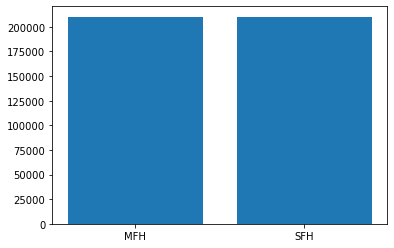

In [3]:
# Identify unique values on builfing type
building_types = res.Building_type.unique()

# Print unique building types
print(building_types)

# Plot distribution of building types
plt.bar(building_types, [len(res[res.Building_type == building_types[0]]), len(res[res.Building_type == building_types[1]])])

It is shown that there are 2 types of buildings, equally distributed: Multi family home (MFH) and Single family home (SFH)

### 3 - Exploratory procedure: construction period

Identify how many construction periods and their distribution

Number of construction periods: 12

Contruction periods: 

['Before 1920' '1920-1945' '1946-1960' '1961-1970' '1971-1980' '1981-1985'
 '1986-1990' '1991-1995' '1996-2000' '2001-2005' '2006-2010' '2011-2015']


([<matplotlib.patches.Wedge at 0x1fa42e0e5e0>,
 [Text(1.062518406696673, 0.28470095790278555, 'Before 1920'),
  Text(0.7778174410990706, 0.7778174775113337, '1920-1945'),
  Text(0.28470090816270893, 1.0625184200244855, '1946-1960'),
  Text(-0.2847010076428615, 1.062518393368858, '1961-1970'),
  Text(-0.7778175139235952, 0.7778174046868056, '1971-1980'),
  Text(-1.0625184333522957, 0.2847008584226317, '1981-1985'),
  Text(-1.062518380041041, -0.28470105738293683, '1986-1990'),
  Text(-0.7778173682745392, -0.7778175503358549, '1991-1995'),
  Text(-0.28470080868255343, -1.0625184466801036, '1996-2000'),
  Text(0.284701107123012, -1.0625183667132212, '2001-2005'),
  Text(0.7778175867481129, -0.777817331862271, '2006-2010'),
  Text(1.0625184600079092, -0.2847007589424754, '2011-2015')])

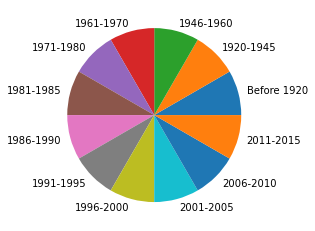

In [4]:
# Identify unique values
cons_period = res.Construction_period.unique()

# Print number of unique values
print('Number of construction periods: ' + str(len(cons_period)) + '\n')

# Print unique values
print('Contruction periods: \n')
print(cons_period)

# Get distribution
period_count = []

for period in cons_period:
    period_count.append(len(res[res.Construction_period == period]))
    
# Plot distribution
plt.pie(period_count, labels = cons_period)

There are 12 different construction periods equally distributed

### 4 - Exploratory procedure: plot one profile

Plot one of the profiles for data viz

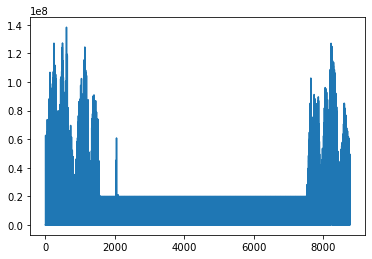

In [5]:
# Choose profile type
variable = 'Hot water + Space Heating demand [J](Hourly)'

# Choose parameters
building_type = building_types[0] # Building type: MFH
period = cons_period[-1] # Construction period: 2011-2015 

# Create mask to filter
mask = (res.Building_type == building_type) & (res.Construction_period == period) & (res.retrofit_scenario == 'Full retrofit')

# Plot profile
plt.plot(range(len(res[mask][variable])), res[mask][variable])

## Commercial buildings

Load data for commercial buildings

In [6]:
com = pd.read_csv('.\\raw_data\\non-flex_demand\\commercial_hour_profile_EMPA.csv')

com

,Date/Time,Building_type,Construction_period,retrofit_scenario,Hot water + Space Heating demand [J](Hourly),Space Heating demand [J](Hourly),Hot water demand [J](Hourly),Space cooling demand [J](Hourly),Electricity demand [J](Hourly)
0,01/01 01:00:00,Hospitals,1920-1945,Full retrofit,1.676114e+08,8.753158e+07,8.007984e+07,0.0,1.070699e+08
1,01/01 02:00:00,Hospitals,1920-1945,Full retrofit,1.614999e+08,8.142008e+07,8.007984e+07,0.0,1.057414e+08
2,01/01 03:00:00,Hospitals,1920-1945,Full retrofit,1.725615e+08,9.248165e+07,8.007984e+07,0.0,1.067259e+08
3,01/01 04:00:00,Hospitals,1920-1945,Full retrofit,1.838060e+08,1.037262e+08,8.007984e+07,0.0,1.061977e+08
4,01/01 05:00:00,Hospitals,1920-1945,Full retrofit,1.927224e+08,1.126425e+08,8.007984e+07,0.0,1.058460e+08
...,...,...,...,...,...,...,...,...,...
394195,12/31 20:00:00,Shops,1991-2000,No retrofit,1.050883e+08,1.036284e+08,1.459871e+06,0.0,3.800596e+08
394196,12/31 21:00:00,Shops,1991-2000,No retrofit,6.103873e+07,6.103873e+07,0.000000e+00,0.0,5.014697e+07
394197,12/31 22:00:00,Shops,1991-2000,No retrofit,9.376660e+07,9.376660e+07,0.000000e+00,0.0,5.014697e+07
394198,12/31 23:00:00,Shops,1991-2000,No retrofit,1.168970e+08,1.168970e+08,0.000000e+00,0.0,5.014697e+07


### Exploratory search

Plot a yearly profile from one office building

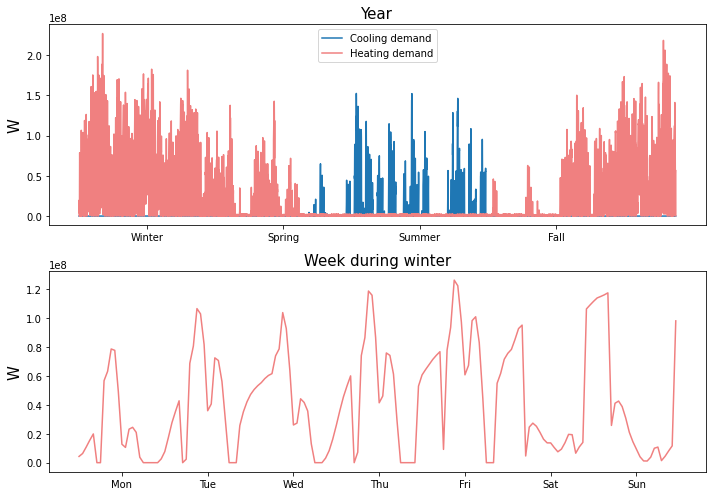

In [7]:
variable = 'Hot water + Space Heating demand [J](Hourly)'
bt = com.Building_type.unique()
cp = com.Construction_period.unique()
rf = com.retrofit_scenario.unique()

mask = (com.Building_type == bt[1]) & (com.Construction_period == cp[5]) & (com.retrofit_scenario == rf[0])

fig, ax = plt.subplots(2, 1, figsize = (10, 7))

ax[0].plot(np.arange(len(com[mask][variable])), com[mask]['Space cooling demand [J](Hourly)'], label = 'Cooling demand', color = 'tab:blue')
ax[0].plot(np.arange(len(com[mask][variable])), com[mask][variable], label = 'Heating demand', color = 'lightcoral')

ax[1].plot(np.arange(24*7), com[mask][variable][0:24*7], label = 'Heating demand', color = 'lightcoral')
#ax[1].plot(com[mask]['Space cooling demand [J](Hourly)'][0:24*7], label = 'Cooling demand', color = 'tab:blue')
ax[0].set_title('Year', size= 15)
ax[0].set_ylabel('W', size= 15)
ax[1].set_ylabel('W', size= 15)
ax[1].set_title('Week during winter', size= 15)
ax[0].legend()
#plt.title('Heat demand for an office building in Switzerland')

plt.sca(ax[0])
plt.xticks([1000, 3000, 5000, 7000], ['Winter', 'Spring', 'Summer', 'Fall'])

plt.sca(ax[1])
plt.xticks([24*(i) + 12 for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()

#plt.savefig('demo.png')

## Start data processing

### Extract features from the dataset

Extract features:
- Type of buildings
- Number of building per type
- Percentage of share of type of building

In [8]:
com_features = pd.DataFrame()
com_features['type_building'] = com.Building_type.unique()
com_features['number_buildings'] = [4453, 11202,  6380, 2115, 7512]
com_features['percentage'] = com_features['number_buildings']/sum(com_features['number_buildings'])
com_features

,type_building,number_buildings,percentage
0,Hospitals,4453,0.140642
1,Offices,11202,0.353800
2,Restaurants,6380,0.201503
3,Schools,2115,0.066799
4,Shops,7512,0.237256


### Define a function to area-normalize the vectors

This will create a vector for which the area under the curve is one. Area is additive

In [9]:
def norm_vector(vector):
    a = np.trapz(vector)

    y = vector/a

    return y

### Process the data

Select a variable to analize, create a mask for extracting the data from the dataset according to the desired features to analyzed, normalize the energy consumption, save in memory and plot

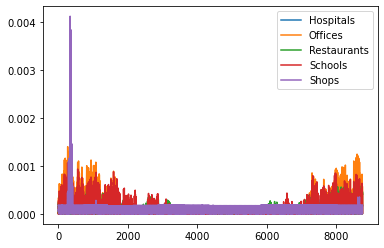

In [10]:
variable = 'Hot water + Space Heating demand [J](Hourly)'
com_profile = np.zeros(len(com[mask][variable]))

output = pd.DataFrame()

mask = (com.Building_type == 'Hospitals') & (com.Construction_period == cp[-3]) & (com.retrofit_scenario == rf[0])

output['date_time'] = com['Date/Time'][mask]

for bt in com_features['type_building']:
    mask = (com.Building_type == bt) & (com.Construction_period == cp[-3]) & (com.retrofit_scenario == rf[0])
    output[bt] = norm_vector(np.array(com[variable][mask]))
    #com_profile += norm_vector(np.array(com[variable][mask]))
    #print(sum(mask))
    plt.plot(norm_vector(np.array(com[variable][mask])), label = bt)
#plt.plot(com_profile)    
plt.legend()

In [11]:
output = output.reset_index(drop = True )

output

,date_time,Hospitals,Offices,Restaurants,Schools,Shops
0,01/01 01:00:00,0.000070,3.341810e-05,0.000178,0.000004,0.000182
1,01/01 02:00:00,0.000070,3.341810e-05,0.000164,0.000004,0.000182
2,01/01 03:00:00,0.000070,3.341810e-05,0.000171,0.000004,0.000182
3,01/01 04:00:00,0.000070,3.341810e-05,0.000180,0.000004,0.000182
4,01/01 05:00:00,0.000070,3.341810e-05,0.000186,0.000004,0.000182
...,...,...,...,...,...,...
8755,12/31 20:00:00,0.000179,4.992250e-07,0.000104,0.000003,0.000024
8756,12/31 21:00:00,0.000173,0.000000e+00,0.000239,0.000015,0.000000
8757,12/31 22:00:00,0.000173,0.000000e+00,0.000462,0.000029,0.000000
8758,12/31 23:00:00,0.000186,5.156644e-04,0.000392,0.000399,0.000182


### Same processing for residential buildings

In [12]:
variable = 'Hot water + Space Heating demand [J](Hourly)'
bt = res.Building_type.unique()
cp = res.Construction_period.unique()
rf = res.retrofit_scenario.unique()

mask = (res.Building_type == 'SFH') & (res.Construction_period == cp[-3]) & (res.retrofit_scenario == rf[0])

output['SFH'] = norm_vector(res[mask][variable].reset_index(drop = True))

mask = (res.Building_type == 'MFH') & (res.Construction_period == cp[-3]) & (res.retrofit_scenario == rf[0])

output['MFH'] = norm_vector(res[mask][variable].reset_index(drop = True))

output

,date_time,Hospitals,Offices,Restaurants,Schools,Shops,SFH,MFH
0,01/01 01:00:00,0.000070,3.341810e-05,0.000178,0.000004,0.000182,0.000000,0.000013
1,01/01 02:00:00,0.000070,3.341810e-05,0.000164,0.000004,0.000182,0.000000,0.000060
2,01/01 03:00:00,0.000070,3.341810e-05,0.000171,0.000004,0.000182,0.000000,0.000089
3,01/01 04:00:00,0.000070,3.341810e-05,0.000180,0.000004,0.000182,0.000000,0.000108
4,01/01 05:00:00,0.000070,3.341810e-05,0.000186,0.000004,0.000182,0.000000,0.000123
...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.000179,4.992250e-07,0.000104,0.000003,0.000024,0.001310,0.000423
8756,12/31 21:00:00,0.000173,0.000000e+00,0.000239,0.000015,0.000000,0.001441,0.000497
8757,12/31 22:00:00,0.000173,0.000000e+00,0.000462,0.000029,0.000000,0.001538,0.000566
8758,12/31 23:00:00,0.000186,5.156644e-04,0.000392,0.000399,0.000182,0.000000,0.000085


### Append temperature

In [13]:
temp = pd.read_csv('.\\raw_data\\weather\\weather_swiss_2019.csv')

output['temperature'] = temp['T amb [C]']

output

,date_time,Hospitals,Offices,Restaurants,Schools,Shops,SFH,MFH,temperature
0,01/01 01:00:00,0.000070,3.341810e-05,0.000178,0.000004,0.000182,0.000000,0.000013,9.1
1,01/01 02:00:00,0.000070,3.341810e-05,0.000164,0.000004,0.000182,0.000000,0.000060,9.3
2,01/01 03:00:00,0.000070,3.341810e-05,0.000171,0.000004,0.000182,0.000000,0.000089,9.1
3,01/01 04:00:00,0.000070,3.341810e-05,0.000180,0.000004,0.000182,0.000000,0.000108,9.0
4,01/01 05:00:00,0.000070,3.341810e-05,0.000186,0.000004,0.000182,0.000000,0.000123,8.8
...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.000179,4.992250e-07,0.000104,0.000003,0.000024,0.001310,0.000423,3.7
8756,12/31 21:00:00,0.000173,0.000000e+00,0.000239,0.000015,0.000000,0.001441,0.000497,3.3
8757,12/31 22:00:00,0.000173,0.000000e+00,0.000462,0.000029,0.000000,0.001538,0.000566,3.0
8758,12/31 23:00:00,0.000186,5.156644e-04,0.000392,0.000399,0.000182,0.000000,0.000085,2.7


### Append signal

In this case we use the Day Ahead Market from Switzerland ENTSO-E

In [14]:
signal = pd.read_csv('.\\raw_data\\signal\\day_ahead_market_swiss_2019.csv')

output['signal'] = signal['Day-ahead Price [EUR/MWh]']

output

#signal

,date_time,Hospitals,Offices,Restaurants,Schools,Shops,SFH,MFH,temperature,signal
0,01/01 01:00:00,0.000070,3.341810e-05,0.000178,0.000004,0.000182,0.000000,0.000013,9.1,50.26
1,01/01 02:00:00,0.000070,3.341810e-05,0.000164,0.000004,0.000182,0.000000,0.000060,9.3,48.74
2,01/01 03:00:00,0.000070,3.341810e-05,0.000171,0.000004,0.000182,0.000000,0.000089,9.1,47.24
3,01/01 04:00:00,0.000070,3.341810e-05,0.000180,0.000004,0.000182,0.000000,0.000108,9.0,36.29
4,01/01 05:00:00,0.000070,3.341810e-05,0.000186,0.000004,0.000182,0.000000,0.000123,8.8,30.09
...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.000179,4.992250e-07,0.000104,0.000003,0.000024,0.001310,0.000423,3.7,44.00
8756,12/31 21:00:00,0.000173,0.000000e+00,0.000239,0.000015,0.000000,0.001441,0.000497,3.3,42.73
8757,12/31 22:00:00,0.000173,0.000000e+00,0.000462,0.000029,0.000000,0.001538,0.000566,3.0,39.71
8758,12/31 23:00:00,0.000186,5.156644e-04,0.000392,0.000399,0.000182,0.000000,0.000085,2.7,36.77


### Print results in folder

In [15]:
output.to_csv('.\\processed_data\\data.csv', index = False)